In [1]:
# Pasting these here for easier access

import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolacors
import pickle
from tqdm import tqdm  # For progress bar
from multiprocessing import Pool, cpu_count
import os
import sys
import time
import datetime 
from math import *

# 05/02/2025

# Continuing the examination of the PKPD curves of different weight groups to figure out where the bug is

<br>

---

<br>

# Objective 1: Plotting the evolution of killing constants for artemether and lumefantrine by weight

<br>

---
    
# Using previously calibrated --pmax_artemether 0.9999994 and --ec50_lum 64 values

--- 

### Function call to examine killing constants by weight

In [4]:
# Function to run a single simulation for a given weight value

def run_single_weight_simulation(weight):
    start_time = time.monotonic()
    command_weight = [
        "/home/venitha_b/Projects/2019-test-ppq-pk/build/run_ppq_pk",
        "--AL",
        "-n", "1000",
        "--pmax_artemether", "0.9999994",
        "--ec50_lum", "64",
        "--weight", str(weight)
    ]

    try:
        # Run the command and capture output
        output_weight = subprocess.run(command_weight, capture_output=True, text=True, check=True)

        # Process the output
        lines_weight = output_weight.stdout.splitlines()
        df_weight = pd.DataFrame([line.split() for line in lines_weight], columns=["PID", "HOUR", "COMP2CONC_ARTEMETHER", "COMP2CONC_LUM", "PARASITEDENSITY"])
        
        # Clean the DataFrame
        df_weight = df_weight.iloc[1:].apply(pd.to_numeric, errors='coerce')

        # Calculate the efficacy
        if df_weight['PARASITEDENSITY'].isna().any():
            failed_treatment_count = np.nan
        else:
            failed_treatment_count = df_weight[(df_weight['PARASITEDENSITY'] >= 10) & (df_weight['HOUR'] == 671.0)].shape[0]
        
        total_patients = df_weight['PID'].nunique()
        
        if total_patients == 0 or np.isnan(failed_treatment_count): 
            efficacy = np.nan
        else:
            percentage_failed = (failed_treatment_count / total_patients) * 100
            efficacy = (100 - percentage_failed)
            if np.isnan(efficacy):
                efficacy = np.nan
        
        end_time = time.monotonic()
        today = datetime.date.today()
        print("\nToday's date: ", today, "\n")
        print("Length of simulation: ", datetime.timedelta(seconds=end_time - start_time), "\n")

        return efficacy, df_weight, failed_treatment_count
        
    except subprocess.CalledProcessError as e:
        print(f"Error in subprocess for weight: {weight}Kg: \n {e}\n")
        return np.nan, None, 0  # Return NaN, None, and 0 in case of failure
    except Exception as e:
        print(f"An unexpected error occurred for weight: {weight}Kg: \n{e}\n")
        return np.nan, None, 0  # Return NaN, None, and 0 in case of failure

In [3]:
weight_values = [10]

for weight in weight_values:

    # Remove the previous files if they exist
    params_file_artemether = f"PK_parameters_{weight}kg_artemether.txt"
    if os.path.isfile(params_file_artemether):
        os.remove(params_file_artemether)

    params_file_lumefantrine = f"PK_parameters_{weight}kg_lumefantrine.txt"
    if os.path.isfile(params_file_lumefantrine):
        os.remove(params_file_lumefantrine)
    
    killing_constant_file_artemether = f"parasite_killing_constant_{weight}kg_artemether.txt"
    if os.path.isfile(killing_constant_file_artemether):
        os.remove(killing_constant_file_artemether)
    
    killing_constant_file_lumefantrine = f"parasite_killing_constant_{weight}kg_lumefantrine.txt"
    if os.path.isfile(killing_constant_file_lumefantrine):
        os.remove(killing_constant_file_lumefantrine)
        
    efficacy, df_weight, failed_treatment_count = run_single_weight_simulation(weight)

    # Save the DataFrame to a pickle file
    df_weight.to_pickle(f"df_weight_{weight}Kg.pyobj")

    # Save the DataFrame to a CSV file
    df_weight.to_csv(f"df_weight_{weight}Kg.csv", index=False)
    print(f"\nThe failed treatment count for weight {weight}Kg is:", failed_treatment_count)
    print(f"\nThe percentage efficacy for weight {weight}Kg:", efficacy, "\n")
    
    


Today's date:  2025-05-02 

Length of simulation:  0:00:29.581256 


The failed treatment count for weight 10Kg is: 436

The percentage efficacy for weight 10Kg: 56.4 



### Weight = 20 Kg

In [5]:
weight_values = [20]

for weight in weight_values:

    # Remove the previous files if they exist
    params_file_artemether = f"PK_parameters_{weight}kg_artemether.txt"
    if os.path.isfile(params_file_artemether):
        os.remove(params_file_artemether)

    params_file_lumefantrine = f"PK_parameters_{weight}kg_lumefantrine.txt"
    if os.path.isfile(params_file_lumefantrine):
        os.remove(params_file_lumefantrine)
    
    killing_constant_file_artemether = f"parasite_killing_constant_{weight}kg_artemether.txt"
    if os.path.isfile(killing_constant_file_artemether):
        os.remove(killing_constant_file_artemether)
    
    killing_constant_file_lumefantrine = f"parasite_killing_constant_{weight}kg_lumefantrine.txt"
    if os.path.isfile(killing_constant_file_lumefantrine):
        os.remove(killing_constant_file_lumefantrine)
        
    efficacy, df_weight, failed_treatment_count = run_single_weight_simulation(weight)

    # Save the DataFrame to a pickle file
    df_weight.to_pickle(f"df_weight_{weight}Kg.pyobj")

    # Save the DataFrame to a CSV file
    df_weight.to_csv(f"df_weight_{weight}Kg.csv", index=False)
    print(f"\nThe failed treatment count for weight {weight}Kg is:", failed_treatment_count)
    print(f"\nThe percentage efficacy for weight {weight}Kg:", efficacy, "\n")
    
    


Today's date:  2025-05-02 

Length of simulation:  0:00:27.701440 


The failed treatment count for weight 20Kg is: 23

The percentage efficacy for weight 20Kg: 97.7 



### Weight = 30 Kg

In [6]:
weight_values = [30]

for weight in weight_values:

    # Remove the previous files if they exist
    params_file_artemether = f"PK_parameters_{weight}kg_artemether.txt"
    if os.path.isfile(params_file_artemether):
        os.remove(params_file_artemether)

    params_file_lumefantrine = f"PK_parameters_{weight}kg_lumefantrine.txt"
    if os.path.isfile(params_file_lumefantrine):
        os.remove(params_file_lumefantrine)
    
    killing_constant_file_artemether = f"parasite_killing_constant_{weight}kg_artemether.txt"
    if os.path.isfile(killing_constant_file_artemether):
        os.remove(killing_constant_file_artemether)
    
    killing_constant_file_lumefantrine = f"parasite_killing_constant_{weight}kg_lumefantrine.txt"
    if os.path.isfile(killing_constant_file_lumefantrine):
        os.remove(killing_constant_file_lumefantrine)
        
    efficacy, df_weight, failed_treatment_count = run_single_weight_simulation(weight)

    # Save the DataFrame to a pickle file
    df_weight.to_pickle(f"df_weight_{weight}Kg.pyobj")

    # Save the DataFrame to a CSV file
    df_weight.to_csv(f"df_weight_{weight}Kg.csv", index=False)
    print(f"\nThe failed treatment count for weight {weight}Kg is:", failed_treatment_count)
    print(f"\nThe percentage efficacy for weight {weight}Kg:", efficacy, "\n")
    
    


Today's date:  2025-05-02 

Length of simulation:  0:00:28.105994 


The failed treatment count for weight 30Kg is: 1

The percentage efficacy for weight 30Kg: 99.9 



### Weight = 40 Kg

In [7]:
weight_values = [40]

for weight in weight_values:

    # Remove the previous files if they exist
    params_file_artemether = f"PK_parameters_{weight}kg_artemether.txt"
    if os.path.isfile(params_file_artemether):
        os.remove(params_file_artemether)

    params_file_lumefantrine = f"PK_parameters_{weight}kg_lumefantrine.txt"
    if os.path.isfile(params_file_lumefantrine):
        os.remove(params_file_lumefantrine)
    
    killing_constant_file_artemether = f"parasite_killing_constant_{weight}kg_artemether.txt"
    if os.path.isfile(killing_constant_file_artemether):
        os.remove(killing_constant_file_artemether)
    
    killing_constant_file_lumefantrine = f"parasite_killing_constant_{weight}kg_lumefantrine.txt"
    if os.path.isfile(killing_constant_file_lumefantrine):
        os.remove(killing_constant_file_lumefantrine)
        
    efficacy, df_weight, failed_treatment_count = run_single_weight_simulation(weight)

    # Save the DataFrame to a pickle file
    df_weight.to_pickle(f"df_weight_{weight}Kg.pyobj")

    # Save the DataFrame to a CSV file
    df_weight.to_csv(f"df_weight_{weight}Kg.csv", index=False)
    print(f"\nThe failed treatment count for weight {weight}Kg is:", failed_treatment_count)
    print(f"\nThe percentage efficacy for weight {weight}Kg:", efficacy, "\n")
    
    


Today's date:  2025-05-02 

Length of simulation:  0:00:30.646643 


The failed treatment count for weight 40Kg is: 0

The percentage efficacy for weight 40Kg: 100.0 



### Weight = 50 Kg

In [8]:
weight_values = [50]

for weight in weight_values:

    # Remove the previous files if they exist
    params_file_artemether = f"PK_parameters_{weight}kg_artemether.txt"
    if os.path.isfile(params_file_artemether):
        os.remove(params_file_artemether)

    params_file_lumefantrine = f"PK_parameters_{weight}kg_lumefantrine.txt"
    if os.path.isfile(params_file_lumefantrine):
        os.remove(params_file_lumefantrine)
    
    killing_constant_file_artemether = f"parasite_killing_constant_{weight}kg_artemether.txt"
    if os.path.isfile(killing_constant_file_artemether):
        os.remove(killing_constant_file_artemether)
    
    killing_constant_file_lumefantrine = f"parasite_killing_constant_{weight}kg_lumefantrine.txt"
    if os.path.isfile(killing_constant_file_lumefantrine):
        os.remove(killing_constant_file_lumefantrine)
        
    efficacy, df_weight, failed_treatment_count = run_single_weight_simulation(weight)

    # Save the DataFrame to a pickle file
    df_weight.to_pickle(f"df_weight_{weight}Kg.pyobj")

    # Save the DataFrame to a CSV file
    df_weight.to_csv(f"df_weight_{weight}Kg.csv", index=False)
    print(f"\nThe failed treatment count for weight {weight}Kg is:", failed_treatment_count)
    print(f"\nThe percentage efficacy for weight {weight}Kg:", efficacy, "\n")
    
    


Today's date:  2025-05-02 

Length of simulation:  0:00:30.909227 


The failed treatment count for weight 50Kg is: 0

The percentage efficacy for weight 50Kg: 100.0 



In [71]:
# Load the dataframes
# Calculate the efficacy for each weight group

failed_treatment_count = []
efficacy = []
df_weight_compiled = []

for weight in [10, 20, 30, 40, 50]:
    # Load the dataframe
    df_weight = pd.read_pickle(f"df_weight_{weight}Kg.pyobj")
    # Calculate the efficacy
    failed_treatment_count.append(df_weight[(df_weight['PARASITEDENSITY'] >= 10) & (df_weight['HOUR'] == 671.0)].shape[0])
    total_patients = df_weight['PID'].nunique()
    efficacy.append((1 - (failed_treatment_count[-1] / total_patients)) * 100 if total_patients > 0 else np.nan)
    # Append the dataframe to the list
    df_weight_compiled.append(df_weight)
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Weight': [10, 20, 30, 40, 50],
    'Failed Treatment Count': failed_treatment_count,
    'Efficacy': efficacy
})


results_df['Efficacy'] = results_df['Efficacy'].round(2)

# Save the results to a CSV file
results_df.to_csv("efficacy_results_compiled.csv", index=False)
# Save the results to a pickle file
results_df.to_pickle("efficacy_results_compiled.pyobj")
# Print the results
print("\nEfficacy Results:")
print(results_df)
 


Efficacy Results:
   Weight  Failed Treatment Count  Efficacy
0      10                     436      56.4
1      20                      23      97.7
2      30                       1      99.9
3      40                       0     100.0
4      50                       0     100.0


<br>
<br>

---

<br>

In [72]:
killing_constant_artemether_dataframes = []

killing_constant_lumefantrine_dataframes = []

# Read the killing constant files for each weight

for weight in [10, 20, 30, 40, 50]:
    temp_artemether = pd.read_csv(f"parasite_killing_constant_{weight}kg_artemether.txt", sep=",", header=None)
    temp_artemether.columns = [f"killing_constant_{weight}", "time(t)"]

    killing_constant_artemether_dataframes.append(temp_artemether)

    temp_lumefantrine = pd.read_csv(f"parasite_killing_constant_{weight}kg_lumefantrine.txt", sep=",", header=None)
    temp_lumefantrine.columns = [f"killing_constant_{weight}", "time(t)"]
    killing_constant_lumefantrine_dataframes.append(temp_lumefantrine)

In [73]:
df_artemether_killing_constant_10Kg = killing_constant_artemether_dataframes[0]
df_artemether_killing_constant_20Kg = killing_constant_artemether_dataframes[1]
df_artemether_killing_constant_30Kg = killing_constant_artemether_dataframes[2]
df_artemether_killing_constant_40Kg = killing_constant_artemether_dataframes[3]
df_artemether_killing_constant_50Kg = killing_constant_artemether_dataframes[4]

df_artemether_killing_constant_merged = pd.merge( df_artemether_killing_constant_10Kg, df_artemether_killing_constant_20Kg, on="time(t)", how="outer")
df_artemether_killing_constant_merged = pd.merge( df_artemether_killing_constant_merged, df_artemether_killing_constant_30Kg, on="time(t)", how="outer")
df_artemether_killing_constant_merged = pd.merge( df_artemether_killing_constant_merged, df_artemether_killing_constant_40Kg, on="time(t)", how="outer")
df_artemether_killing_constant_merged = pd.merge( df_artemether_killing_constant_merged, df_artemether_killing_constant_50Kg, on="time(t)", how="outer")

df_artemether_killing_constant_merged.head()

,killing_constant_10,time(t),killing_constant_20,killing_constant_30,killing_constant_40,killing_constant_50
0,-0.000000,0,-0.000000,-0.000000,-0.000000,-0.000000
1,0.596931,1,0.596931,0.596931,0.594711,0.596931
2,0.596931,2,0.596931,0.596931,0.596931,0.596931
3,0.596931,3,0.596931,0.596931,0.596931,0.596931
4,0.596931,4,0.596931,0.596931,0.596931,0.596931


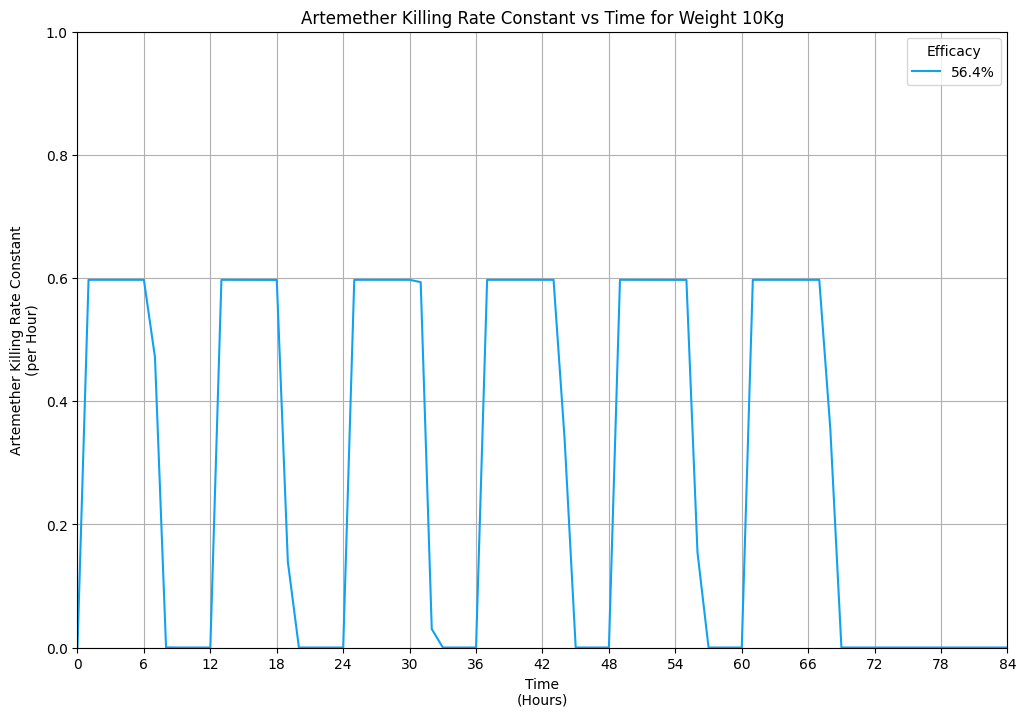

In [147]:
import matplotlib.pyplot as plt
import random

# Define the weights
weights = [10]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each weight's killing constant
for weight in weights:
    plt.plot(
        df_artemether_killing_constant_merged["time(t)"], 
        df_artemether_killing_constant_merged[f"killing_constant_{weight}"], 
        label=f"{results_df["Efficacy"][(weight/10)-1]}%",
        color= plt.colormaps.get_cmap("rainbow")(random.random()))
    i += 1

# Add labels, title, and legend
plt.xlabel("Time\n(Hours)")
plt.xticks(range(0, 672, 6))
plt.xlim(0, 84)


plt.ylabel("Artemether Killing Rate Constant\n(per Hour)")
plt.ylim(0, 1)

weight = weights[0]
plt.title(f"Artemether Killing Rate Constant vs Time for Weight {weight}Kg")
plt.legend(title="Efficacy")
plt.grid(True)

# Save the plot
plt.savefig(f"killing_rate_constant_artemether_{weight}kg.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

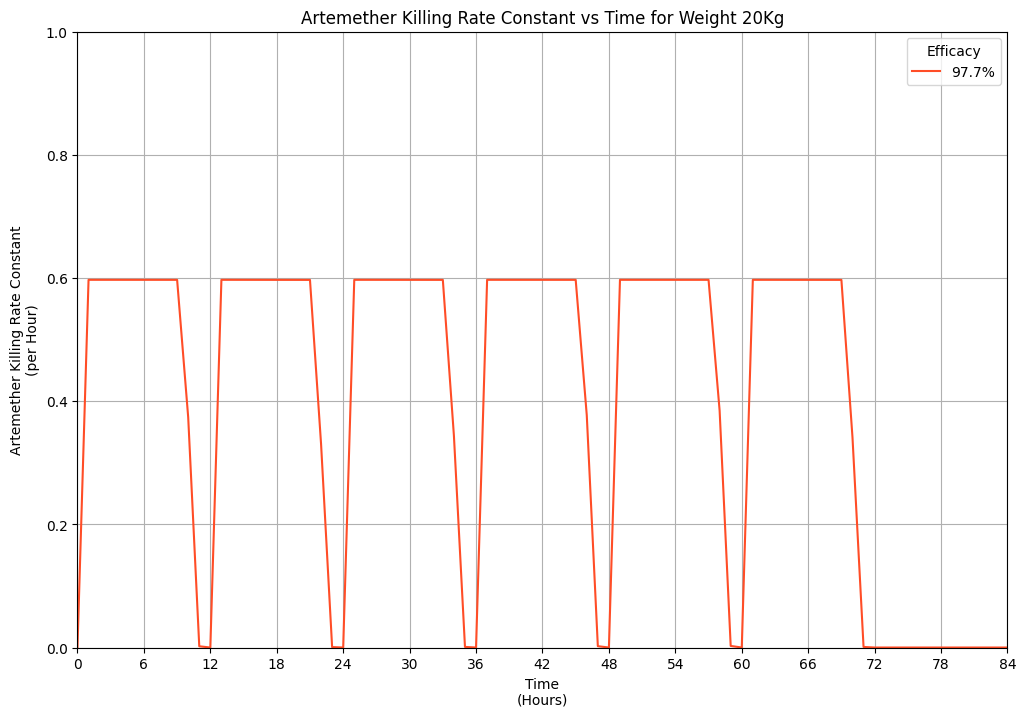

In [148]:
import matplotlib.pyplot as plt
import random

# Define the weights
weights = [20]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each weight's killing constant
for weight in weights:
    plt.plot(
        df_artemether_killing_constant_merged["time(t)"], 
        df_artemether_killing_constant_merged[f"killing_constant_{weight}"], 
        label=f"{results_df["Efficacy"][(weight/10)-1]}%",
        color= plt.colormaps.get_cmap("rainbow")(random.random()))
    i += 1

# Add labels, title, and legend
plt.xlabel("Time\n(Hours)")
plt.xticks(range(0, 672, 6))
plt.xlim(0, 84)


plt.ylabel("Artemether Killing Rate Constant\n(per Hour)")
plt.ylim(0, 1)


weight = weights[0]
plt.title(f"Artemether Killing Rate Constant vs Time for Weight {weight}Kg")
plt.legend(title="Efficacy")
plt.grid(True)

# Save the plot
plt.savefig(f"killing_rate_constant_artemether_{weight}kg.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

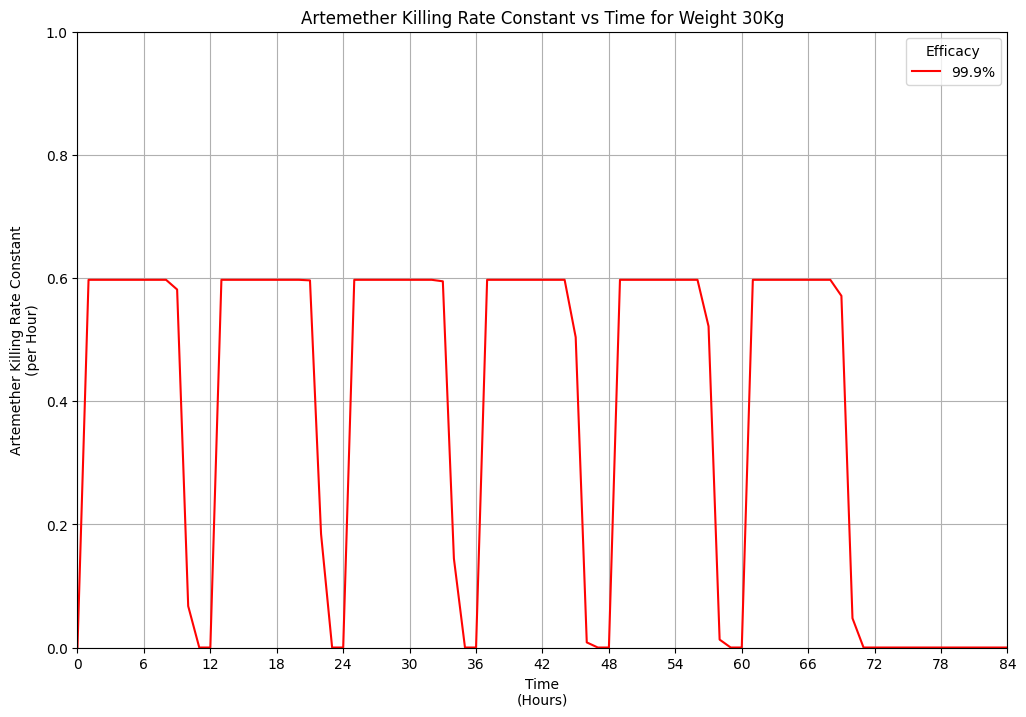

In [151]:
import matplotlib.pyplot as plt
import random

# Define the weights
weights = [30]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each weight's killing constant
for weight in weights:
    plt.plot(
        df_artemether_killing_constant_merged["time(t)"], 
        df_artemether_killing_constant_merged[f"killing_constant_{weight}"], 
        label=f"{results_df["Efficacy"][(weight/10)-1]}%",
        color= plt.colormaps.get_cmap("rainbow")(random.random()))
    i += 1

# Add labels, title, and legend
plt.xlabel("Time\n(Hours)")
plt.xticks(range(0, 672, 6))
plt.xlim(0, 84)


plt.ylabel("Artemether Killing Rate Constant\n(per Hour)")
plt.ylim(0, 1)


weight = weights[0]
plt.title(f"Artemether Killing Rate Constant vs Time for Weight {weight}Kg")
plt.legend(title="Efficacy")
plt.grid(True)

# Save the plot
plt.savefig(f"killing_rate_constant_artemether_{weight}kg.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

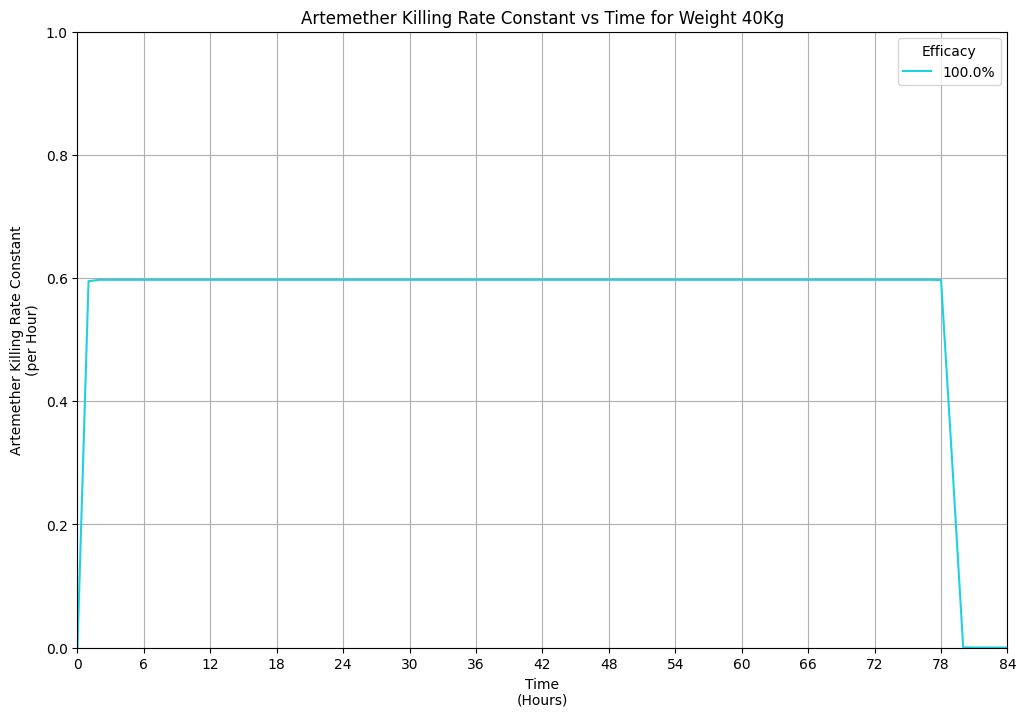

In [152]:
import matplotlib.pyplot as plt
import random

# Define the weights
weights = [40]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each weight's killing constant
for weight in weights:
    plt.plot(
        df_artemether_killing_constant_merged["time(t)"], 
        df_artemether_killing_constant_merged[f"killing_constant_{weight}"], 
        label=f"{results_df["Efficacy"][(weight/10)-1]}%",
        color= plt.colormaps.get_cmap("rainbow")(random.random()))
    i += 1

# Add labels, title, and legend
plt.xlabel("Time\n(Hours)")
plt.xticks(range(0, 672, 6))
plt.xlim(0, 84)


plt.ylabel("Artemether Killing Rate Constant\n(per Hour)")
plt.ylim(0, 1)


weight = weights[0]
plt.title(f"Artemether Killing Rate Constant vs Time for Weight {weight}Kg")
plt.legend(title="Efficacy")
plt.grid(True)

# Save the plot
plt.savefig(f"killing_rate_constant_artemether_{weight}kg.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

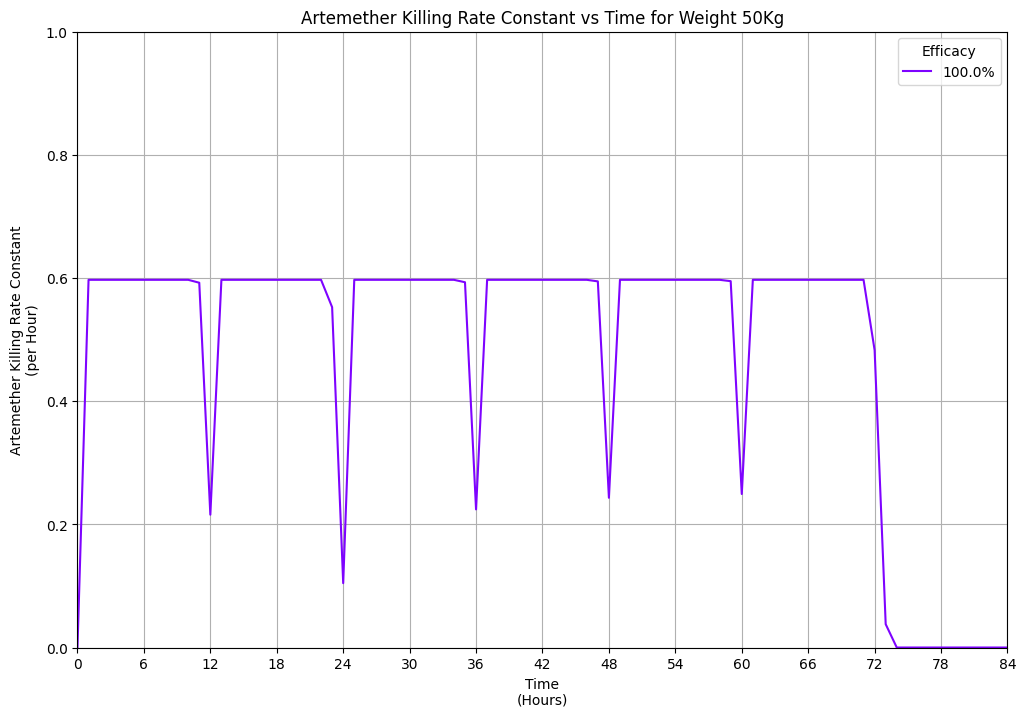

In [160]:
import matplotlib.pyplot as plt
import random

# Define the weights
weights = [50]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each weight's killing constant
for weight in weights:
    plt.plot(
        df_artemether_killing_constant_merged["time(t)"], 
        df_artemether_killing_constant_merged[f"killing_constant_{weight}"], 
        label=f"{results_df["Efficacy"][(weight/10)-1]}%",
        color= plt.colormaps.get_cmap("rainbow")(random.random()))
    i += 1

# Add labels, title, and legend
plt.xlabel("Time\n(Hours)")
plt.xticks(range(0, 672, 6))
plt.xlim(0, 84)


plt.ylabel("Artemether Killing Rate Constant\n(per Hour)")
plt.ylim(0, 1)


weight = weights[0]
plt.title(f"Artemether Killing Rate Constant vs Time for Weight {weight}Kg")
plt.legend(title="Efficacy")
plt.grid(True)

# Save the plot
plt.savefig(f"killing_rate_constant_artemether_{weight}kg.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

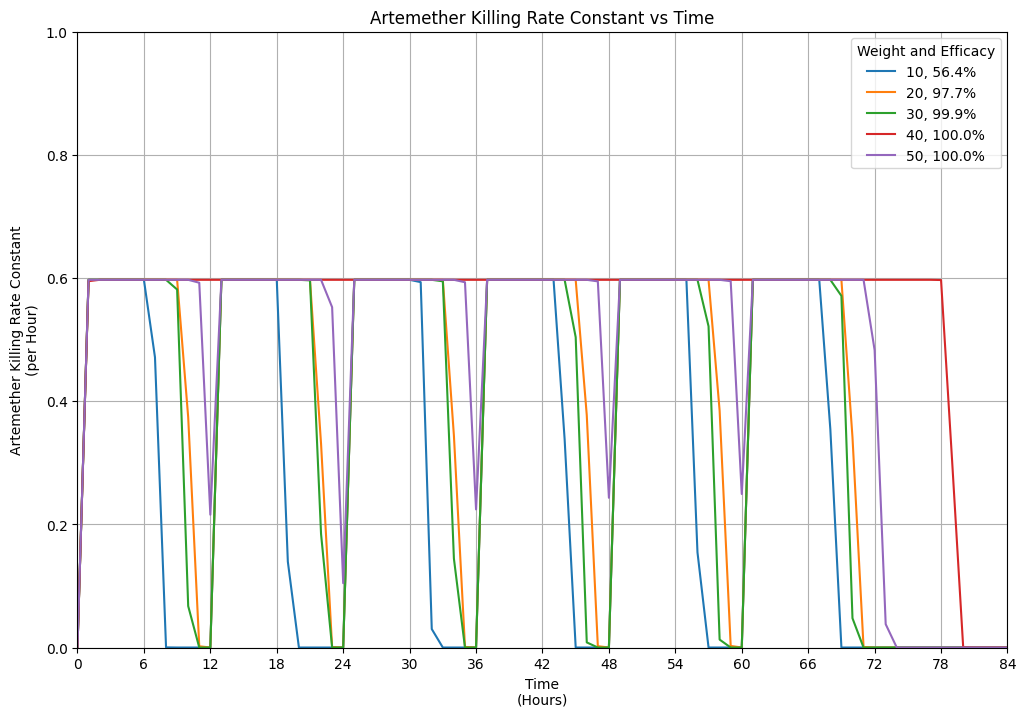

In [168]:
import matplotlib.pyplot as plt
import random

# Define the weights
weights = [10, 20, 30, 40, 50]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each weight's killing constant
for i in np.arange(1,len(weights)+1):
    plt.plot(
        df_artemether_killing_constant_merged["time(t)"], 
        df_artemether_killing_constant_merged[f"killing_constant_{i*10}"], 
        label=f"{i*10}, {results_df["Efficacy"][i-1]}%")
    i += 1

# Add labels, title, and legend
plt.xlabel("Time\n(Hours)")
plt.xticks(range(0, 672, 6))
plt.xlim(0, 84)


plt.ylabel("Artemether Killing Rate Constant\n(per Hour)")
plt.ylim(0, 1)


plt.title("Artemether Killing Rate Constant vs Time")
plt.legend(title="Weight and Efficacy")
plt.grid(True)

# Save the plot
plt.savefig("killing_rate_constant_vs_time_by_weight_artemether.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

/tmp/ipykernel_83428/2570082044.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Paired', len(weights))  # 'plasma', 'Set2', or 'tab10' also work


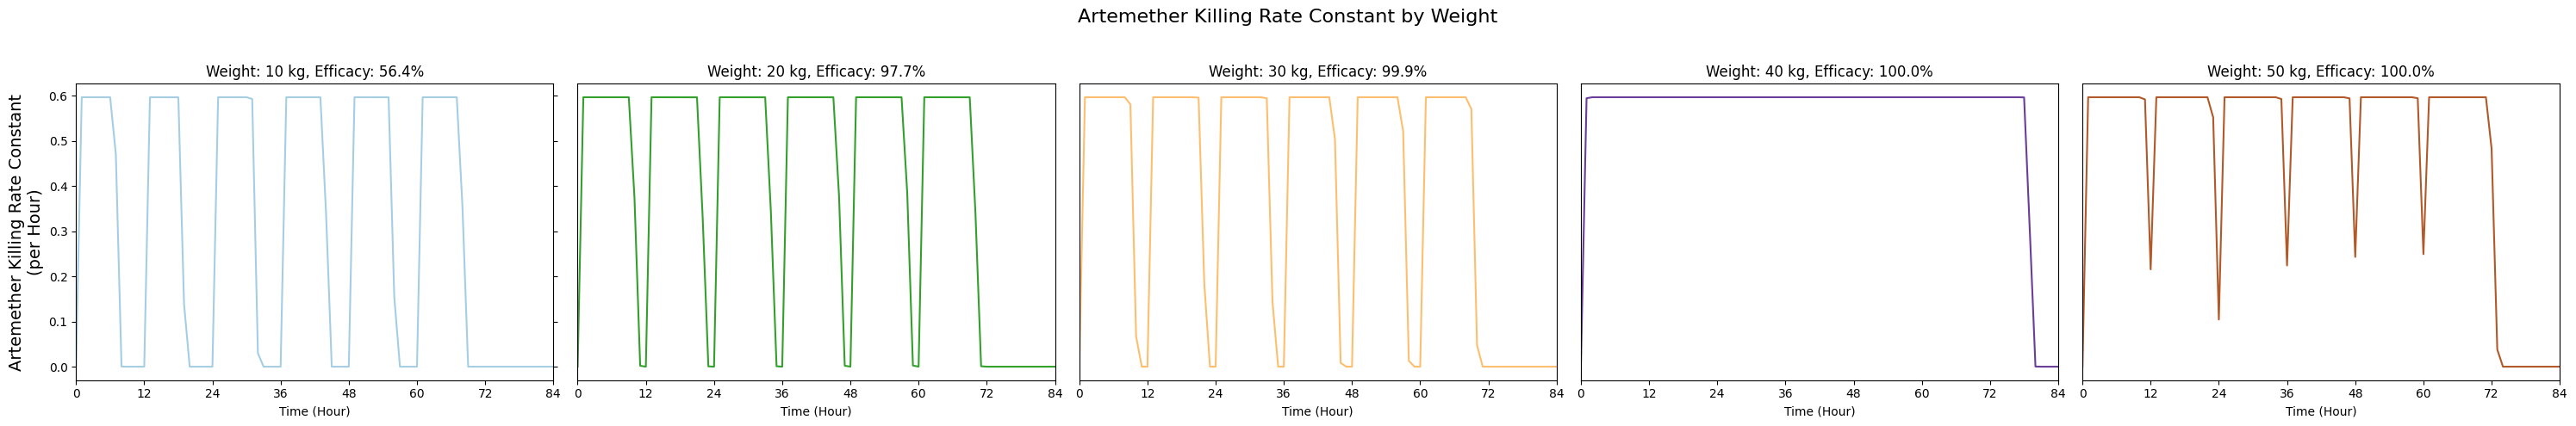

In [223]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors


# Define the weights
weights = [10, 20, 30, 40, 50]

# Create the figure and axes
fig, axs = plt.subplots(1, 5, figsize=(30, 5), sharey=True)

cmap = plt.cm.get_cmap('Paired', len(weights))  # 'plasma', 'Set2', or 'tab10' also work
colors = [cmap(i) for i in range(len(weights))]

# Plot each weight's killing constant in its own subplot
for i, ax in enumerate(axs):
    weight = weights[i]
    ax.plot(
        df_artemether_killing_constant_merged["time(t)"], 
        df_artemether_killing_constant_merged[f"killing_constant_{weight}"],
        color=colors[i])
    
    ax.set_title(f"Weight: {weight} kg, Efficacy: {results_df['Efficacy'][i]}%")
    ax.set_xlabel("Time (Hour)")
    ax.set_xticks(range(0, 85, 12))
    ax.set_xlim(0, 84)
    #ax.grid(True)
    
    
    # Hide the ticks for the y-axis on all but the first subplot
    if i != 0:
        ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False, labelright=False)
    else:
        ax.set_ylabel("Artemether Killing Rate Constant\n(per Hour)", fontsize=14)
        ax.tick_params(axis='y', which='both', left=True, right=True, labelleft=True, labelright=False)

        
# Overall title and save
fig.suptitle("Artemether Killing Rate Constant by Weight", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("killing_rate_constant_by_weight_artemether_subplot.png", dpi=300, bbox_inches='tight')
plt.show()


In [75]:
df_lumefantrine_killing_constant_10Kg = killing_constant_lumefantrine_dataframes[0]
df_lumefantrine_killing_constant_20Kg = killing_constant_lumefantrine_dataframes[1]
df_lumefantrine_killing_constant_30Kg = killing_constant_lumefantrine_dataframes[2]
df_lumefantrine_killing_constant_40Kg = killing_constant_lumefantrine_dataframes[3]
df_lumefantrine_killing_constant_50Kg = killing_constant_lumefantrine_dataframes[4]

df_lumefantrine_killing_constant_merged = pd.merge( df_lumefantrine_killing_constant_10Kg, df_lumefantrine_killing_constant_20Kg, on="time(t)", how="outer")
df_lumefantrine_killing_constant_merged = pd.merge( df_lumefantrine_killing_constant_merged, df_lumefantrine_killing_constant_30Kg, on="time(t)", how="outer")
df_lumefantrine_killing_constant_merged = pd.merge( df_lumefantrine_killing_constant_merged, df_lumefantrine_killing_constant_40Kg, on="time(t)", how="outer")
df_lumefantrine_killing_constant_merged = pd.merge( df_lumefantrine_killing_constant_merged, df_lumefantrine_killing_constant_50Kg, on="time(t)", how="outer")

df_lumefantrine_killing_constant_merged.head()

,killing_constant_10,time(t),killing_constant_20,killing_constant_30,killing_constant_40,killing_constant_50
0,-0.000000e+00,0,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
1,-0.000000e+00,1,1.133350e-15,1.295260e-16,1.783380e-11,2.119990e-10
2,3.700740e-17,2,4.214390e-12,1.429410e-15,3.393730e-08,4.206570e-06
3,1.124100e-15,3,2.232960e-10,1.461790e-15,9.892560e-07,1.101160e-03
4,6.739980e-15,4,2.156520e-09,9.483160e-16,5.621520e-06,3.310840e-02


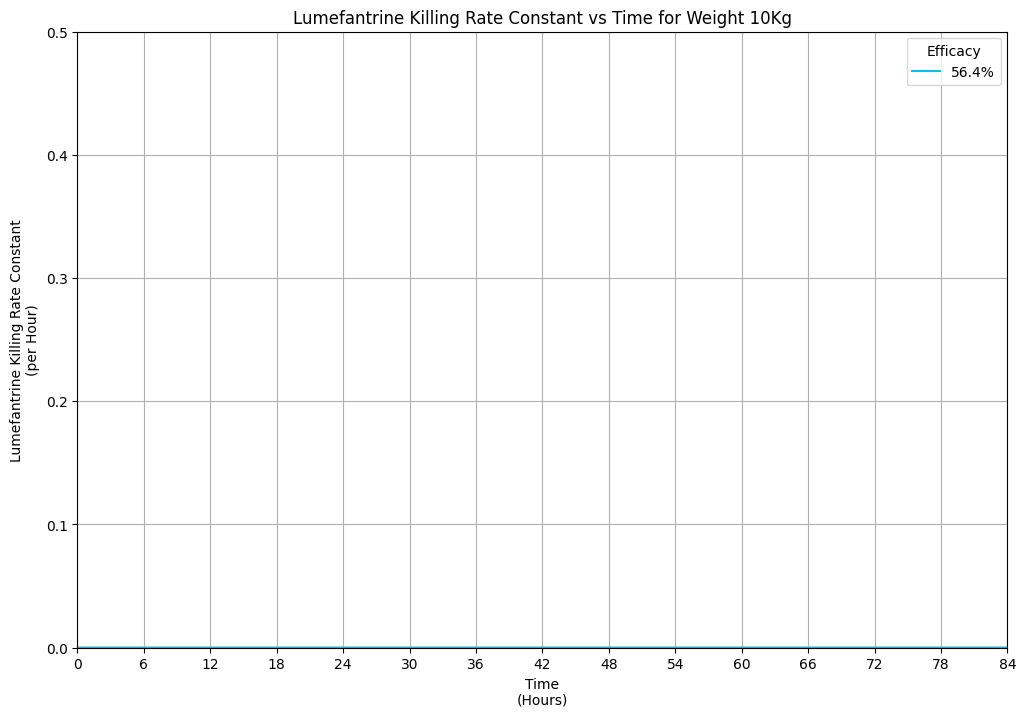

In [169]:
import matplotlib.pyplot as plt
import random

# Define the weights
weights = [10]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each weight's killing constant
for weight in weights:
    plt.plot(
        df_lumefantrine_killing_constant_merged["time(t)"], 
        df_lumefantrine_killing_constant_merged[f"killing_constant_{weight}"], 
        label=f"{results_df["Efficacy"][(weight/10)-1]}%",
        color= plt.colormaps.get_cmap("rainbow")(random.random()))
    i += 1

# Add labels, title, and legend
plt.xlabel("Time\n(Hours)")
plt.xticks(range(0, 672, 6))
plt.xlim(0, 84)


plt.ylabel("Lumefantrine Killing Rate Constant\n(per Hour)")
plt.ylim(0, 0.5)

weight = weights[0]
plt.title(f"Lumefantrine Killing Rate Constant vs Time for Weight {weight}Kg")
plt.legend(title="Efficacy")
plt.grid(True)

# Save the plot
plt.savefig(f"killing_rate_constant_lumefantrine_{weight}kg.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

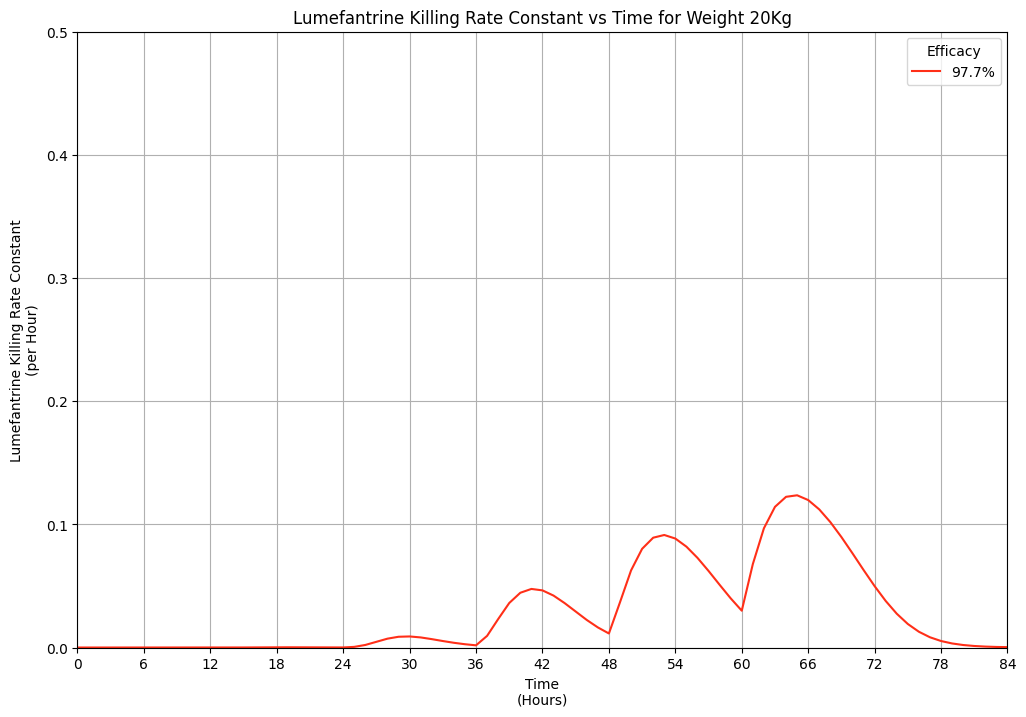

In [171]:
import matplotlib.pyplot as plt
import random

# Define the weights
weights = [20]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each weight's killing constant
for weight in weights:
    plt.plot(
        df_lumefantrine_killing_constant_merged["time(t)"], 
        df_lumefantrine_killing_constant_merged[f"killing_constant_{weight}"], 
        label=f"{results_df["Efficacy"][(weight/10)-1]}%",
        color= plt.colormaps.get_cmap("rainbow")(random.random()))
    i += 1

# Add labels, title, and legend
plt.xlabel("Time\n(Hours)")
plt.xticks(range(0, 672, 6))
plt.xlim(0, 84)


plt.ylabel("Lumefantrine Killing Rate Constant\n(per Hour)")
plt.ylim(0, 0.5)

weight = weights[0]
plt.title(f"Lumefantrine Killing Rate Constant vs Time for Weight {weight}Kg")
plt.legend(title="Efficacy")
plt.grid(True)

# Save the plot
plt.savefig(f"killing_rate_constant_lumefantrine_{weight}kg.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

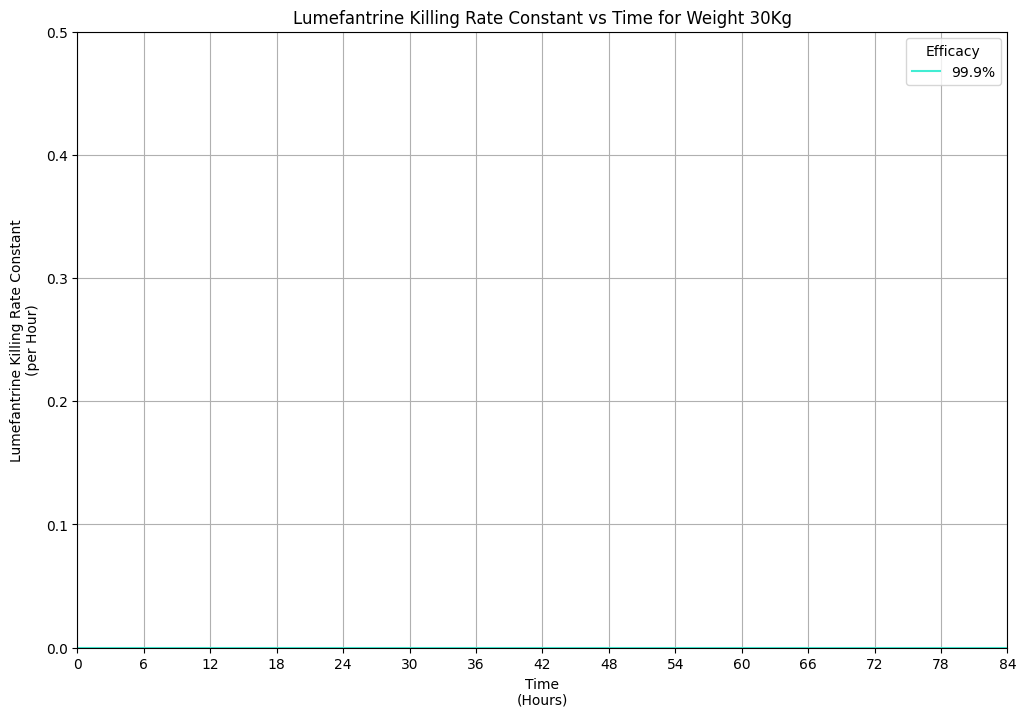

In [172]:
import matplotlib.pyplot as plt
import random

# Define the weights
weights = [30]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each weight's killing constant
for weight in weights:
    plt.plot(
        df_lumefantrine_killing_constant_merged["time(t)"], 
        df_lumefantrine_killing_constant_merged[f"killing_constant_{weight}"], 
        label=f"{results_df["Efficacy"][(weight/10)-1]}%",
        color= plt.colormaps.get_cmap("rainbow")(random.random()))
    i += 1

# Add labels, title, and legend
plt.xlabel("Time\n(Hours)")
plt.xticks(range(0, 672, 6))
plt.xlim(0, 84)


plt.ylabel("Lumefantrine Killing Rate Constant\n(per Hour)")
plt.ylim(0, 0.5)

weight = weights[0]
plt.title(f"Lumefantrine Killing Rate Constant vs Time for Weight {weight}Kg")
plt.legend(title="Efficacy")
plt.grid(True)

# Save the plot
plt.savefig(f"killing_rate_constant_lumefantrine_{weight}kg.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

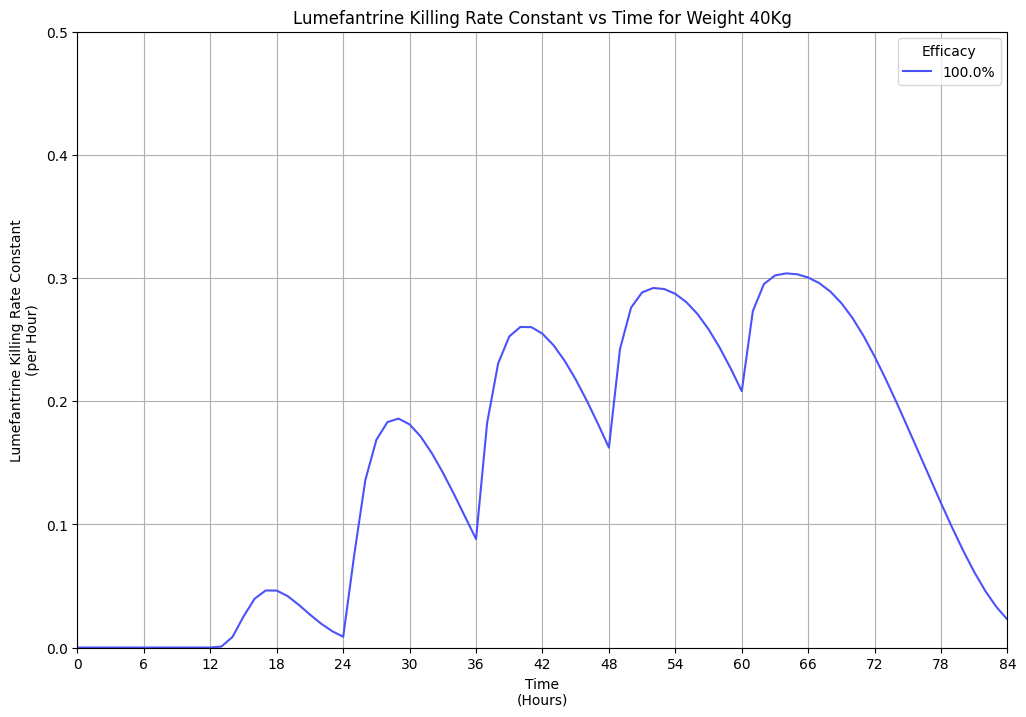

In [174]:
import matplotlib.pyplot as plt
import random

# Define the weights
weights = [40]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each weight's killing constant
for weight in weights:
    plt.plot(
        df_lumefantrine_killing_constant_merged["time(t)"], 
        df_lumefantrine_killing_constant_merged[f"killing_constant_{weight}"], 
        label=f"{results_df["Efficacy"][(weight/10)-1]}%",
        color= plt.colormaps.get_cmap("rainbow")(random.random()))
    i += 1

# Add labels, title, and legend
plt.xlabel("Time\n(Hours)")
plt.xticks(range(0, 672, 6))
plt.xlim(0, 84)


plt.ylabel("Lumefantrine Killing Rate Constant\n(per Hour)")
plt.ylim(0, 0.5)

weight = weights[0]
plt.title(f"Lumefantrine Killing Rate Constant vs Time for Weight {weight}Kg")
plt.legend(title="Efficacy")
plt.grid(True)

# Save the plot
plt.savefig(f"killing_rate_constant_lumefantrine_{weight}kg.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

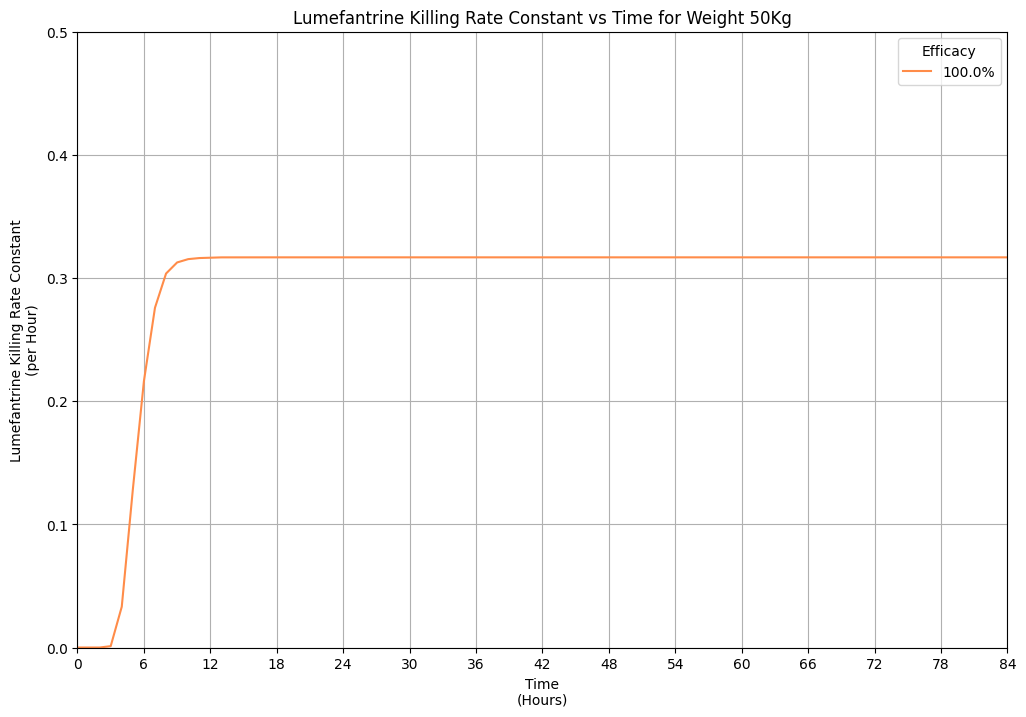

In [175]:
import matplotlib.pyplot as plt
import random

# Define the weights
weights = [50]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each weight's killing constant
for weight in weights:
    plt.plot(
        df_lumefantrine_killing_constant_merged["time(t)"], 
        df_lumefantrine_killing_constant_merged[f"killing_constant_{weight}"], 
        label=f"{results_df["Efficacy"][(weight/10)-1]}%",
        color= plt.colormaps.get_cmap("rainbow")(random.random()))
    i += 1

# Add labels, title, and legend
plt.xlabel("Time\n(Hours)")
plt.xticks(range(0, 672, 6))
plt.xlim(0, 84)


plt.ylabel("Lumefantrine Killing Rate Constant\n(per Hour)")
plt.ylim(0, 0.5)

weight = weights[0]
plt.title(f"Lumefantrine Killing Rate Constant vs Time for Weight {weight}Kg")
plt.legend(title="Efficacy")
plt.grid(True)

# Save the plot
plt.savefig(f"killing_rate_constant_lumefantrine_{weight}kg.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

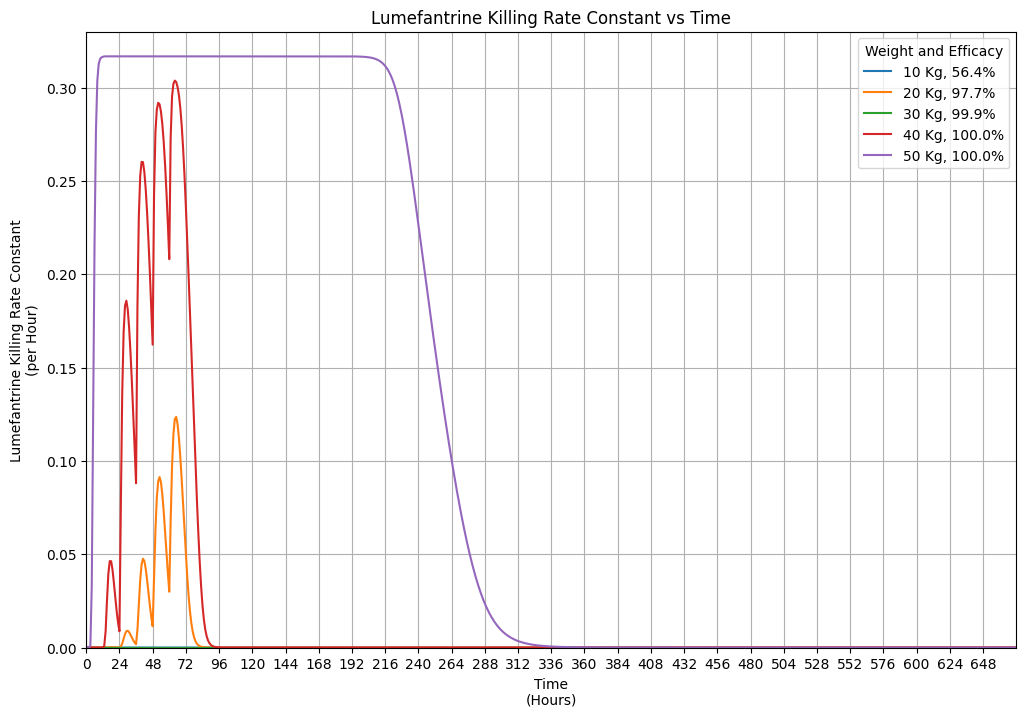

In [176]:
import matplotlib.pyplot as plt

# Define the weights
weights = [10, 20, 30, 40, 50]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each weight's killing constant
for i in np.arange(1,len(weights)+1):
    plt.plot(
        df_lumefantrine_killing_constant_merged["time(t)"], 
        df_lumefantrine_killing_constant_merged[f"killing_constant_{i*10}"], 
        label=f"{i*10} Kg, {results_df["Efficacy"][i-1]}%")
    i += 1
    

# Add labels, title, and legend
plt.xlabel("Time\n(Hours)")
plt.xticks(range(0, 672, 24))
plt.xlim(0, 672)


plt.ylabel("Lumefantrine Killing Rate Constant\n(per Hour)")
plt.ylim(0, 0.33)


plt.title("Lumefantrine Killing Rate Constant vs Time")
plt.legend(title="Weight and Efficacy")
plt.grid(True)


# Show the plot
plt.show()

/tmp/ipykernel_83428/1584286466.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Paired', len(weights))  # 'plasma', 'Set2', or 'tab10' also work


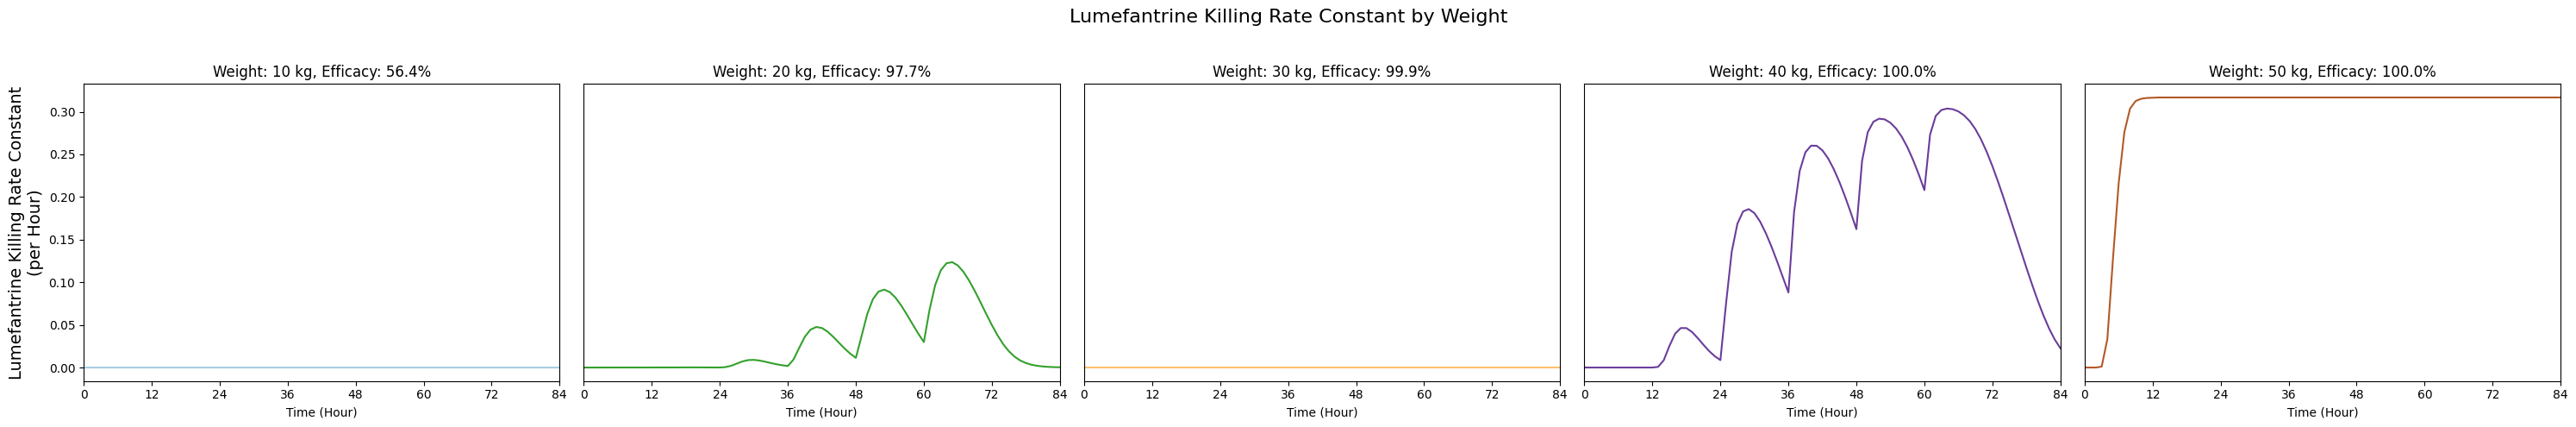

In [225]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors


# Define the weights
weights = [10, 20, 30, 40, 50]

# Create the figure and axes
fig, axs = plt.subplots(1, 5, figsize=(30, 5), sharey=True)

cmap = plt.cm.get_cmap('Paired', len(weights))  # 'plasma', 'Set2', or 'tab10' also work
colors = [cmap(i) for i in range(len(weights))]

# Plot each weight's killing constant in its own subplot
for i, ax in enumerate(axs):
    weight = weights[i]
    ax.plot(
        df_lumefantrine_killing_constant_merged["time(t)"], 
        df_lumefantrine_killing_constant_merged[f"killing_constant_{weight}"],
        color=colors[i])
    
    ax.set_title(f"Weight: {weight} kg, Efficacy: {results_df['Efficacy'][i]}%")
    ax.set_xlabel("Time (Hour)")
    ax.set_xticks(range(0, 85, 12))
    ax.set_xlim(0, 84)
    
    # Hide the ticks for the y-axis on all but the first subplot
    if i != 0:
        ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False, labelright=False)
    else:
        ax.set_ylabel("Lumefantrine Killing Rate Constant\n(per Hour)", fontsize=14)
        ax.tick_params(axis='y', left=True, right=False, labelleft=True, labelright=False)


# Overall title and save
fig.suptitle("Lumefantrine Killing Rate Constant by Weight", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("killing_rate_constant_by_weight_lumefantrine_subplot.png", dpi=300, bbox_inches='tight')
plt.show()
